# **THE SPARKS FOUNDATION**
# Data Science & Business Analytics Internship
# By **Kamran khan**
# TASK-5: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
##  As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
##  Suggest teams or players a company should endorse for its products.

### Importing necessary libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

### Loading Datasets

In [38]:
data = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [39]:
data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [40]:
deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


### Checking the Columns of the Dataset

In [41]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [42]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

### Displaying The info of both the dataset

In [43]:
# Matches data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [44]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Checking the Shape of the Datset

In [45]:
print('Matches data shape =',data.shape)
print('Deliveries data Shape =',deliveries.shape)

Matches data shape = (756, 18)
Deliveries data Shape = (179078, 21)


# **Handling Missing Values**

# Checking the percentage of Missing values in rows

### **Matches dataset**

In [46]:
total_columns = data.shape[1]

# Percentage_of_Missing_values_in_rows
missing = data.isnull().sum(axis =1)/total_columns*100

missing.sort_values(ascending =False).head(15)

300    16.666667
753    16.666667
570    16.666667
4      16.666667
545    16.666667
469    11.111111
461    11.111111
462    11.111111
466    11.111111
468    11.111111
476    11.111111
744    11.111111
474    11.111111
406     5.555556
425     5.555556
dtype: float64

### **Deliveries Dataset**

In [47]:
total_columns = deliveries.shape[1]

# Percentage_of_Missing_values_in_rows
missing = deliveries.isnull().sum(axis =1)/total_columns*100

missing.sort_values(ascending =False).head(15)

0         14.285714
117907    14.285714
117899    14.285714
117900    14.285714
117901    14.285714
117902    14.285714
117903    14.285714
117904    14.285714
117905    14.285714
117906    14.285714
117909    14.285714
117919    14.285714
117910    14.285714
117911    14.285714
117912    14.285714
dtype: float64

# Checking the percentage of Missing values in columns

### **Matches dataset**

In [48]:
total = data.shape[0]

# Displaying the Percentage of Missing values in the columns
missing_val = (data.isnull().sum()/total)*100

missing_val.sort_values(ascending =False).head(20)

umpire3            84.259259
city                0.925926
winner              0.529101
player_of_match     0.529101
umpire2             0.264550
umpire1             0.264550
venue               0.000000
win_by_wickets      0.000000
win_by_runs         0.000000
id                  0.000000
season              0.000000
result              0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
date                0.000000
dl_applied          0.000000
dtype: float64

**Droping the most missing values column**

In [49]:
data = data.drop("umpire3", axis =1,)

### **Deliveries Dataset**

In [50]:
total = deliveries.shape[0]

# Displaying the Percentage of Missing values in the columns
missing_val = (deliveries.isnull().sum()/total)*100

missing_val.sort_values(ascending =False).head(20)

fielder             96.399334
dismissal_kind      95.066954
player_dismissed    95.066954
bye_runs             0.000000
total_runs           0.000000
extra_runs           0.000000
batsman_runs         0.000000
penalty_runs         0.000000
noball_runs          0.000000
legbye_runs          0.000000
match_id             0.000000
inning               0.000000
is_super_over        0.000000
bowler               0.000000
non_striker          0.000000
batsman              0.000000
ball                 0.000000
over                 0.000000
bowling_team         0.000000
batting_team         0.000000
dtype: float64

**Droping the most missing values column**

In [51]:
deliveries=deliveries.drop(["fielder", "dismissal_kind", "player_dismissed"], axis =1)

# Handling Unique Values

In [52]:
# Checking Unique Values in the columns
print(f"Total Number of Rows = { data.shape[0]}")
data.nunique().sort_values(ascending  =False).head(10)

Total Number of Rows = 756


id                 756
date               546
player_of_match    226
win_by_runs         89
umpire2             65
umpire1             61
venue               41
city                32
team2               15
toss_winner         15
dtype: int64

In [53]:
data =data.drop("id", axis =1)

# Handling Duplicated Values

In [54]:
print(f"Matches Dataset duplicated values ={data.duplicated().sum()}")
print(f"Deliveries Dataset duplicated values ={deliveries.duplicated().sum()}")

Matches Dataset duplicated values =0
Deliveries Dataset duplicated values =24


**Droping Duplicated values**

In [55]:
deliveries = deliveries.drop_duplicates()

# Visualizations of some important features

# Most Successful Teams in IPL

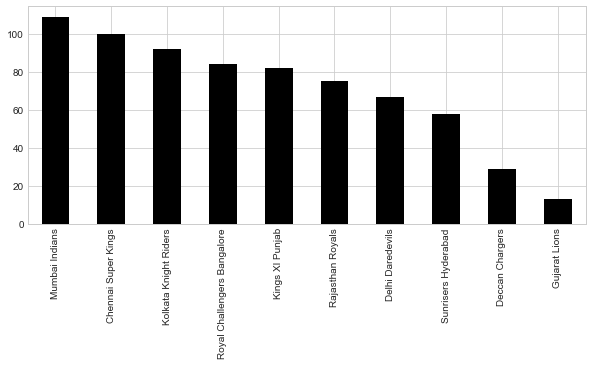

In [56]:
data.winner.value_counts()[:10].plot(kind = "bar", color ="black", figsize =(10,4))
plt.show()

# The Most Successful Players in IPL

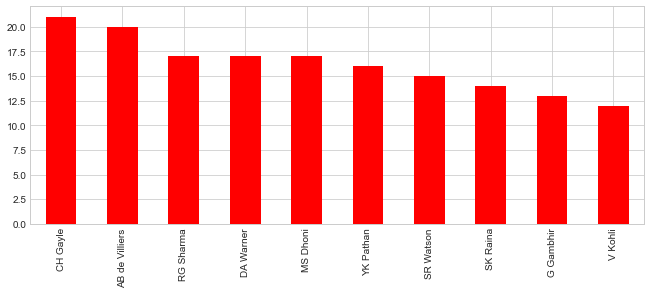

In [57]:
plt.figure(figsize=(11,4))
data.player_of_match.value_counts()[:10].plot(kind = "bar", color ="red")
plt.show()

# Toss Factor contributing in wining or lossing of Match.

Text(0.5, 0, 'Wining Toss and match')

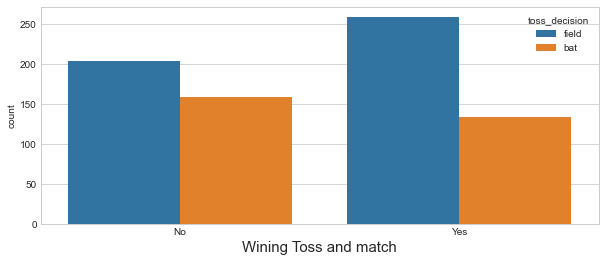

In [58]:
data['toss_win_game_win'] = np.where((data.toss_winner == data.winner),'Yes','No')

plt.figure(figsize =(10,4))
sns.countplot(x= "toss_win_game_win",  hue = "toss_decision",data =data)
plt.xlabel("Wining Toss and match", fontsize="15")

# Player's performance Which have mostly led his team to win

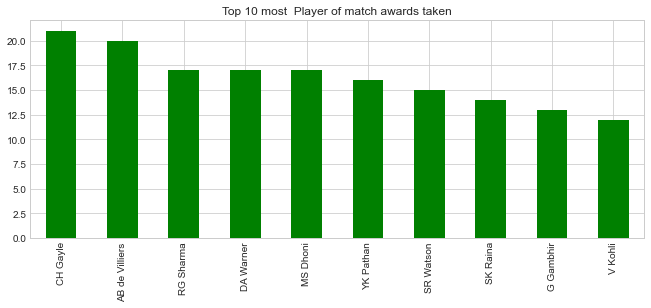

In [59]:
plt.figure(figsize=(11,4))
data.player_of_match.value_counts()[:10].plot(kind = "bar", color ="green")
plt.title("Top 10 most  Player of match awards taken")
plt.show()

# IPL Highest Run Scorers

<AxesSubplot:>

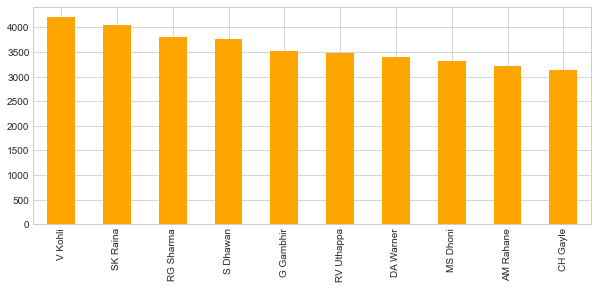

In [60]:
deliveries['batsman'].value_counts()[:10].plot(kind ="bar",
                                               color ="orange",
                                               figsize =(10,4))

# Number of matches played in stadium

Text(0.5, 1.0, 'Top 10 Most Matches played Stadiums')

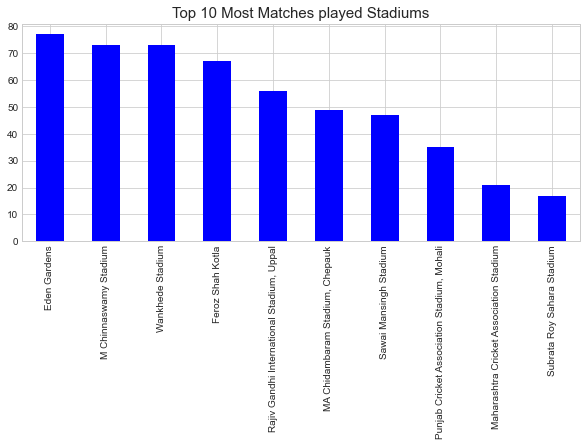

In [61]:
data.venue.value_counts()[:10].plot(kind ="bar", color ="blue", figsize =(10,4))
plt.title("Top 10 Most Matches played Stadiums", fontsize =15)

# Toss Decision to field or bat across seasons

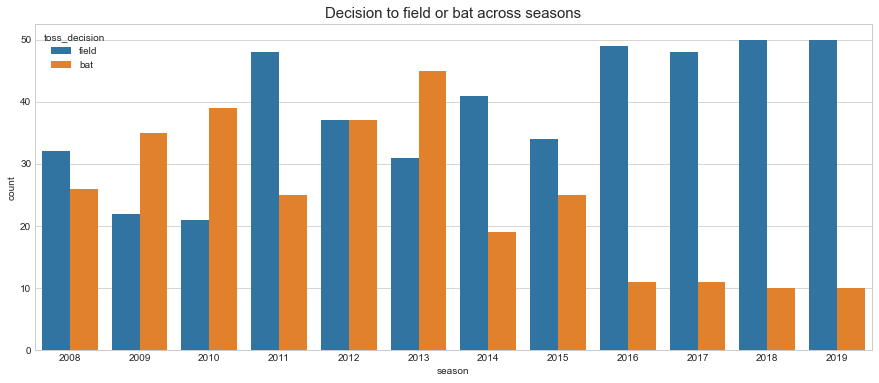

In [62]:
plt.subplots(figsize=(15,6))
sns.countplot(x='season',hue='toss_decision',data=data )
plt.title("Decision to field or bat across seasons", fontsize =15)
plt.show()

# Does teams choosed to bat or field first, after winning toss?

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

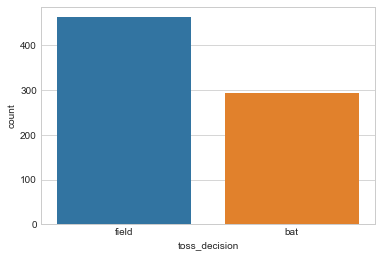

In [63]:
sns.countplot(x= "toss_decision", data=data)

# **Conclusion**

#### Most Successful Teams and Players
* **The Most successful teams are** MI, Chennai and KKR
* **The Most Successful Player are**:  Virat Kohli, Chris Gayle, AB de Villiers, Suresh Raina and Rohit Sharma

#### Factors contributing win or loss of a team
* **Toss Factor** : Wining a toss is contributing more in team wining
* **Toss Decision**: Chosing the Field option after wining a toss is mostly led the team to win
* **Player's Performance**: Chris Gayle, AB de Villiers, RG sharma, D warner are the top players with Higest No of Man of the Match awards taken

#### Teams or Players a company should endorse for its products.

As a company you should invest in **MI, Chennai and RCB** and on 
**Virat Kohli, Chris Gayle, AB de Villiers, Suresh Raina, Rohit Sharma** Because these are the Top Performing Teams and Players